#**Búsqueda de Conjuntos de Datos:**
* Buscar al menos cuatro conjuntos de datos en plataformas como Kaggle, UCI Machine Learning Repository o cualquier otra fuente confiable.
* Asegurarse de que los conjuntos de datos seleccionados sean diversos y cubran diferentes dominios y tipos de datos.

# Dataset

* [Diabetes prediction](https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset/data)

# **Análisis Exploratorio de Datos (EDA) Inicial:**
* Realizar un EDA inicial para cada uno de los cuatro conjuntos de datos seleccionados.
* Incluir visualizaciones, análisis estadístico descriptivo, identificación de valores nulos y outliers.
* Documentar los hallazgos de cada EDA en un notebook de Jupyter.

# EDA Dataset II

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("iammustafatz/diabetes-prediction-dataset")

print("Path to dataset files:", path)

100%|██████████| 734k/734k [00:00<00:00, 1.17MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/iammustafatz/diabetes-prediction-dataset/versions/1


In [2]:
import pandas as pd
# Ruta de archivo CSV
data = pd.read_csv(path + "/diabetes_prediction_dataset.csv")
# Mostrar registros
data

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [3]:
# hacer una copia del dato original
df = data.copy()
# Datos nulos
df.isna().sum()

,0
gender,0
age,0
hypertension,0
heart_disease,0
smoking_history,0
bmi,0
HbA1c_level,0
blood_glucose_level,0
diabetes,0


In [4]:
# Contar los valos unicos de df
df.nunique()

,0
gender,3
age,102
hypertension,2
heart_disease,2
smoking_history,6
bmi,4247
HbA1c_level,18
blood_glucose_level,18
diabetes,2


In [5]:
# Informacion de DF
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [6]:
# Columnas númericas y categoricas
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

In [7]:
# Convertir columnas categoricas a tipo 'category'
df[categorical_cols] = df[categorical_cols].astype('category')

In [8]:
# Valores unicos de columnas categoricas
for col in categorical_cols:
    print(f"Valores únicos en la columna '{col}':")
    print(df[col].unique())
    print()

Valores únicos en la columna 'gender':
['Female', 'Male', 'Other']
Categories (3, object): ['Female', 'Male', 'Other']

Valores únicos en la columna 'smoking_history':
['never', 'No Info', 'current', 'former', 'ever', 'not current']
Categories (6, object): ['No Info', 'current', 'ever', 'former', 'never', 'not current']



In [9]:
# Contar datos duplicardos
df.duplicated().sum()

3854

In [10]:
# Eliminar datos duplicados
df = df.drop_duplicates()

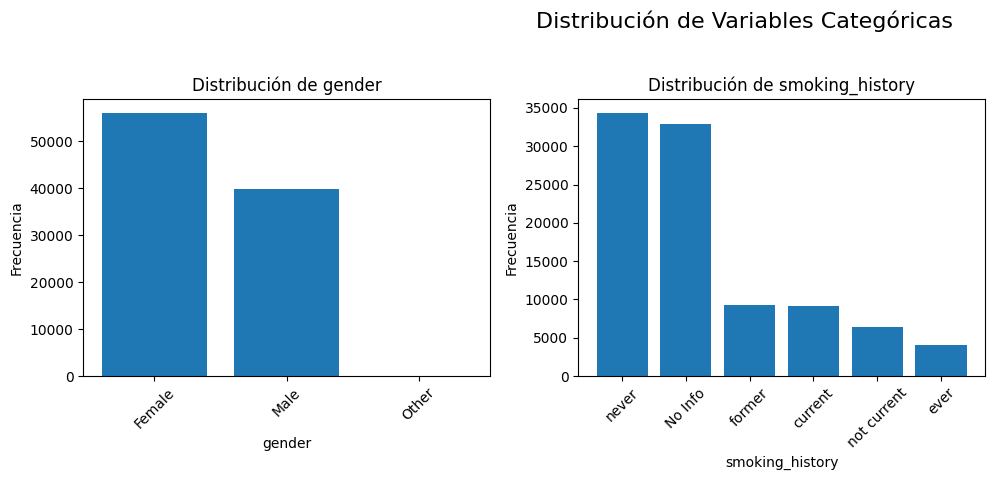

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Determinar el número de filas y columnas para los subplots
num_cols = 3  # Número de columnas en la cuadrícula de subplots
num_rows = (len(categorical_cols) + 1) // num_cols  # Calcula el número de filas necesarias

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))
fig.suptitle("Distribución de Variables Categóricas", fontsize=16)

# Aplanar el arreglo de ejes para iterar fácilmente
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    ax = axes[i]
    value_counts = df[col].value_counts()
    ax.bar(value_counts.index, value_counts.values)
    ax.set_title(f"Distribución de {col}")
    ax.set_xlabel(col)
    ax.set_ylabel("Frecuencia")
    ax.tick_params(axis='x', rotation=45)

# Eliminar cualquier subplot vacío si hay
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [12]:
# Contador de genero e historial de tabaquismo
df[['gender','smoking_history']].value_counts(ascending=True).to_dict()

{('Other', 'ever'): 1,
 ('Other', 'never'): 3,
 ('Other', 'No Info'): 6,
 ('Other', 'not current'): 8,
 ('Male', 'ever'): 1761,
 ('Female', 'ever'): 2236,
 ('Male', 'not current'): 2496,
 ('Female', 'not current'): 3863,
 ('Male', 'current'): 4186,
 ('Male', 'former'): 4556,
 ('Female', 'former'): 4743,
 ('Female', 'current'): 5011,
 ('Male', 'never'): 12056,
 ('Male', 'No Info'): 14912,
 ('Female', 'No Info'): 17969,
 ('Female', 'never'): 22339}

In [13]:
# Descripcion de datos númericos
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000
mean,41.794326,0.077601,0.040803,27.321461,5.532609,138.218231,0.088220
std,22.462948,0.267544,0.197833,6.767716,1.073232,40.909771,0.283616
min,0.080000,0.000000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.000000,0.000000,23.400000,4.800000,100.000000,0.000000
50%,43.000000,0.000000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,59.000000,0.000000,0.000000,29.860000,6.200000,159.000000,0.000000
max,80.000000,1.000000,1.000000,95.690000,9.000000,300.000000,1.000000


                          age  hypertension  heart_disease       bmi  \
age                  1.000000      0.257305       0.238451  0.344797   
hypertension         0.257305      1.000000       0.119982  0.148111   
heart_disease        0.238451      0.119982       1.000000  0.061376   
bmi                  0.344797      0.148111       0.061376  1.000000   
HbA1c_level          0.106719      0.081441       0.068140  0.084423   
blood_glucose_level  0.114317      0.084834       0.070832  0.092543   
diabetes             0.264927      0.195710       0.170711  0.214932   

                     HbA1c_level  blood_glucose_level  diabetes  
age                     0.106719             0.114317  0.264927  
hypertension            0.081441             0.084834  0.195710  
heart_disease           0.068140             0.070832  0.170711  
bmi                     0.084423             0.092543  0.214932  
HbA1c_level             1.000000             0.171615  0.406408  
blood_glucose_level     0.1

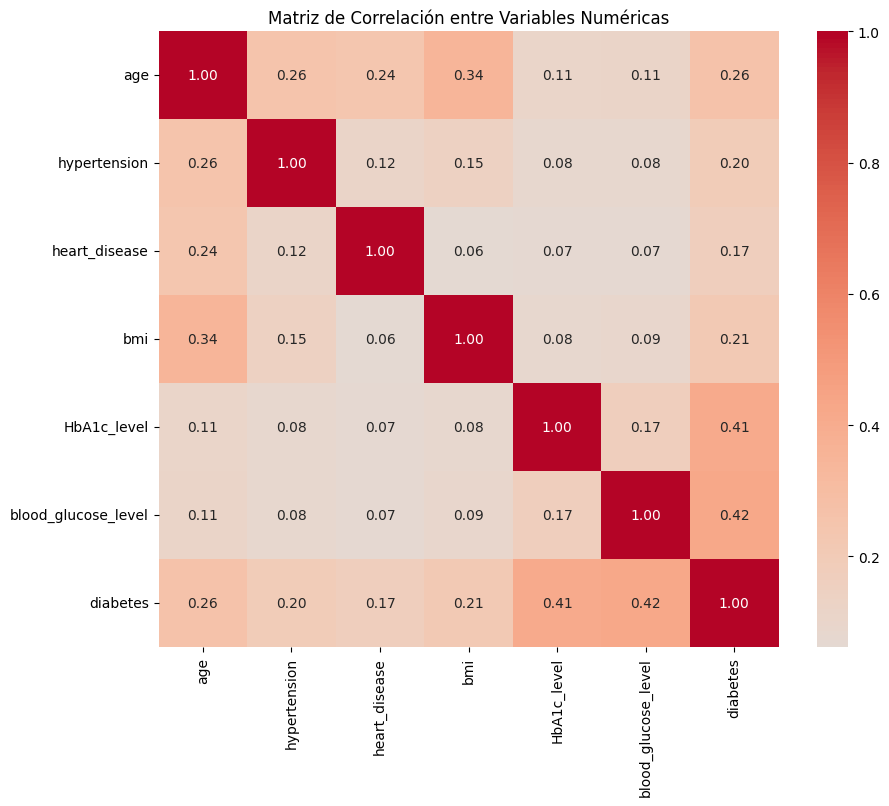

In [14]:
# Correlación de los datos numéricos
correlation_matrix = df[numerical_cols].corr()
print(correlation_matrix)

# Mapa de calor de la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt=".2f")
plt.title('Matriz de Correlación entre Variables Numéricas')
plt.show()

In [15]:
# Función para identificar outliers usando IQR
def identify_outliers_iqr(df, columns):
    outlier_indices = []
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        # Definición de límites
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Identificación de outliers
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outlier_indices.extend(outliers.index.tolist())

    return set(outlier_indices)

# Identificando outliers en las variables numéricas
outlier_indices = identify_outliers_iqr(df, numerical_cols)
num_outliers = len(outlier_indices)
num_data = len(df)

print(f"Número total de outliers identificados: {num_outliers}")
print(f"Porcentaje de outliers: {(num_outliers / num_data) * 100:.2f}%")

Número total de outliers identificados: 19505
Porcentaje de outliers: 20.29%


In [16]:
# Filtrar el DataFrame sin outliers
df_no_outliers = df.drop(index=outlier_indices)
print(f"Tamaño del DataFrame con outliers: {df.shape}")
print(f"Tamaño del DataFrame sin outliers: {df_no_outliers.shape}")

Tamaño del DataFrame con outliers: (96146, 9)
Tamaño del DataFrame sin outliers: (76641, 9)


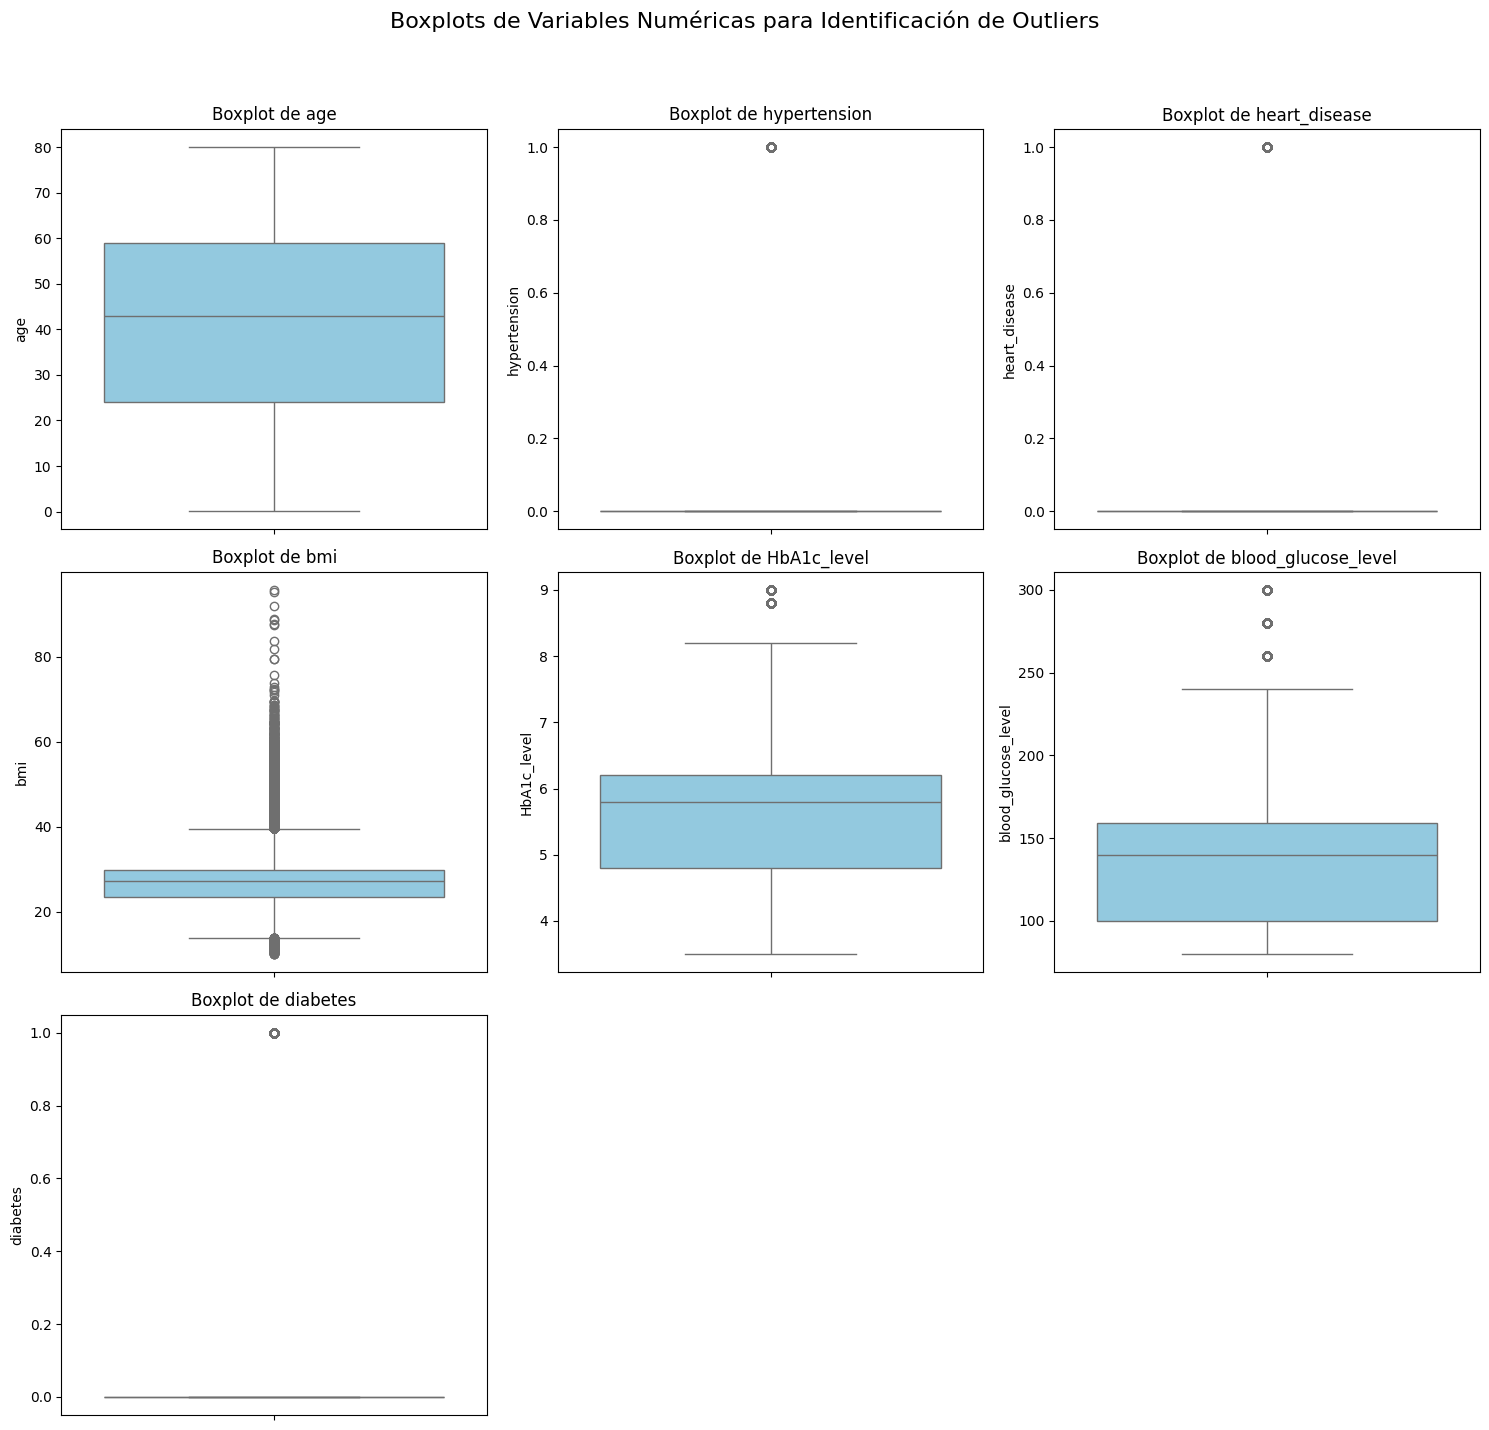

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Definir el tamaño del gráfico y la cuadrícula de subplots
num_cols = 3  # Número de columnas de subplots
num_rows = (len(numerical_cols) + num_cols - 1) // num_cols  # Número de filas necesarias

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))
fig.suptitle("Boxplots de Variables Numéricas para Identificación de Outliers", fontsize=16)

# Aplanar los ejes para iterar más fácilmente
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    ax = axes[i]
    sns.boxplot(data=df, y=col, ax=ax, color='skyblue')
    ax.set_title(f"Boxplot de {col}")

# Eliminar subplots vacíos si hay
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [18]:
# Filtrar el DataFrame sin outliers
# df = df.drop(index=outlier_indices)

In [19]:
# Información de los datos limpios
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96146 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   gender               96146 non-null  category
 1   age                  96146 non-null  float64 
 2   hypertension         96146 non-null  int64   
 3   heart_disease        96146 non-null  int64   
 4   smoking_history      96146 non-null  category
 5   bmi                  96146 non-null  float64 
 6   HbA1c_level          96146 non-null  float64 
 7   blood_glucose_level  96146 non-null  int64   
 8   diabetes             96146 non-null  int64   
dtypes: category(2), float64(3), int64(4)
memory usage: 8.1 MB


#**Diagnóstico y Selección de Problema:**
* Basándose en el EDA inicial, diagnosticar las principales características y desafíos de cada conjunto de datos.
* Elegir una problemática específica para abordar (regresión, clasificación, clusterización, predicción).
* Justificar la elección del problema y explicar por qué es relevante y desafiante.

# Dataset II

**Diagnóstico:**
* Incluye datos clínicos de pacientes, como edad, índice de masa corporal (IMC), presión arterial y otros indicadores de salud.
* Desafíos: El conjunto de datos puede tener valores atípicos en variables como el IMC y la presión arterial. También puede haber valores nulos en algunas variables.

**Problema Seleccionado:**
* Clasificación para predecir si un paciente tiene diabetes.

**Justificación:**
* La predicción de diabetes es de gran relevancia en la salud pública, ya que permite identificar a personas en riesgo y tomar medidas preventivas.
* Es un problema desafiante, ya que la diabetes depende de múltiples factores que interactúan de manera compleja, y además, el desequilibrio entre las clases (pacientes con y sin diabetes) puede complicar el modelo de clasificación.